In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#from tensorflow import keras
import keras
import matplotlib.pyplot as plt
from vis.visualization import visualize_saliency
from vis.visualization import get_num_filters
from vis.visualization import visualize_activation
from vis.utils import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations

/users/ai/u7ysrv/anaconda3/envs/samel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/ai/u7ysrv/anaconda3/envs/samel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/ai/u7ysrv/anaconda3/envs/samel/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/ai/u7ysrv/anaconda3/envs/samel

# 1. Loading Data 

## Read dataset

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(trainX, trainY),(testX, testY) = data.load_data()

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [6]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [7]:
print(trainX.shape)

(60000, 28, 28, 1)


# Training

## Code for training

In [8]:
#Creates Sequential model using Keras
#Number of nodes is the same as number of features (different number of nodes were tried but it did not
#affect validation accuracy significantly)
lenet = keras.Sequential([
                            #Input layer:
                            keras.layers.Conv2D(20, 5, padding="same", input_shape=[28,28,1], use_bias=True),
                            #Hidden Layers:
                            keras.layers.Activation(activation="relu"),
                            keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                            keras.layers.Conv2D(50, 5, padding="same"),
                            keras.layers.Activation(activation="relu"),
                            keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                            keras.layers.Flatten(),
                            keras.layers.Dense(500),
                            keras.layers.Activation(activation="relu"),
                            keras.layers.Dense(10, name='vis',use_bias=True),
                            #Output layer
                            keras.layers.Activation(activation="softmax"),
                        ])

In [9]:
#lenets = [keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet),keras.models.clone_model(lenet)]

In [10]:
classifier_number = 5
lenets = [keras.models.clone_model(lenet)]
for i in range(1,classifier_number):
    lenets.append(keras.models.clone_model(lenet))

In [11]:
#Compiles sequential model
#Using learning rate 0.01
#Loss function will be categorical crossentropy
lenet.compile(
                optimizer=keras.optimizers.SGD(lr=0.01),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
                )
#Trains network over a number of epochs and evaluates network agains validation data
#after each epoch
lenetEpochHistory = lenet.fit(trainX, trainY, epochs = 5, validation_data = (testX, testY))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 273us/step - loss: 0.4388 - acc: 0.8762 - val_loss: 0.1300 - val_acc: 0.9600
Epoch 2/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.1123 - acc: 0.9665 - val_loss: 0.0727 - val_acc: 0.9776
Epoch 3/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.0770 - acc: 0.9764 - val_loss: 0.0628 - val_acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0618 - acc: 0.9811 - val_loss: 0.0488 - val_acc: 0.9840
Epoch 5/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0417 - val_acc: 0.9872


In [12]:
#Compiles sequential model
#Using learning rate 0.01
#Loss function will be categorical crossentropy
for model in lenets:
    model.compile(
                    optimizer=keras.optimizers.SGD(lr=0.01),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy']
                    )
#Trains network over a number of epochs and evaluates network agains validation data
#after each epoch
for model in lenets:
    model.fit(trainX, trainY, epochs = 5, validation_data = (testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.4428 - acc: 0.8712 - val_loss: 0.1473 - val_acc: 0.9539
Epoch 2/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.1118 - acc: 0.9663 - val_loss: 0.0721 - val_acc: 0.9766
Epoch 3/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0760 - acc: 0.9772 - val_loss: 0.0588 - val_acc: 0.9816
Epoch 4/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.0599 - acc: 0.9823 - val_loss: 0.0614 - val_acc: 0.9796
Epoch 5/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0501 - acc: 0.9843 - val_loss: 0.0457 - val_acc: 0.9858
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.4099 - acc: 0.8830 - val_loss: 0.1523 - val_acc: 0.9532
Epoch 2/5
60000/60000 [==============================] - 12s 204us/step 

# General Evaluation

In [13]:
#Predicting Label:

print(np.argmax(lenet.predict(testX)[100]))
print(np.argmax(testY[100]))

6
6


10000/10000 [==============================] - 1s 81us/step
Lenet accuracy:  0.9872
Lenet loss:  0.041655284570157526


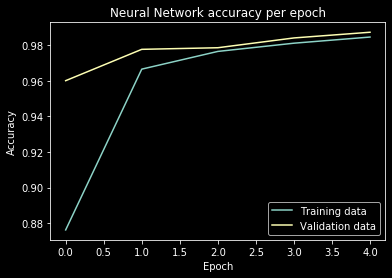

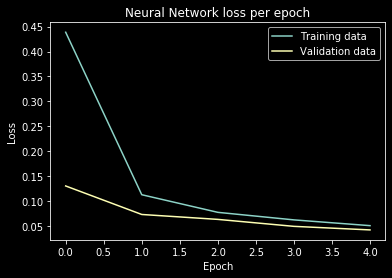

In [14]:
#Get accuracy for lenet
sequentialLoss, sequentialAccuracy = lenet.evaluate(testX, testY)
print('Lenet accuracy: ', sequentialAccuracy)
print('Lenet loss: ', sequentialLoss)

plt.style.use('dark_background')
plt.plot(lenetEpochHistory.history['acc'])
plt.plot(lenetEpochHistory.history['val_acc'])
plt.title('Neural Network accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'])
plt.show()

plt.style.use('dark_background')
plt.plot(lenetEpochHistory.history['loss'])
plt.plot(lenetEpochHistory.history['val_loss'])
plt.title('Neural Network loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'])
plt.show()

# Saliency

In [15]:
#This line outputs the layer_idx that the saliency is meant to be extracted from. (Usually the output layer pre-activation)
utils.find_layer_idx(lenet, 'vis')

9

In [16]:
#Check if that layer is correct by checking if the number of nodes matches the number of outputs
get_num_filters(lenet.layers[9])

10

144.21692


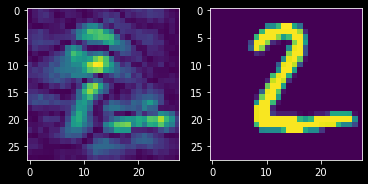

In [29]:
#Check if the saliency map is working for the singular network
input_idx = 1
fig, ax = plt.subplots(nrows=1, ncols=2)
saliency_map = visualize_saliency(model = lenet,layer_idx = 9, filter_indices = np.argmax(testY[input_idx]), seed_input = testX[input_idx])
ax[0].imshow(saliency_map.reshape(28,28),interpolation='nearest')
ax[1].imshow(testX[input_idx].reshape(28,28))
print(np.sum(saliency_map))
plt.show()

In [21]:
#This prints out the pre-activation outputs for the output layer
intermediate_layer_model = keras.Model(inputs=lenet.input,
                                 outputs=lenet.get_layer("vis").output)
intermediate_output = intermediate_layer_model.predict(testX)[input_idx]
print(max(intermediate_output))
print(lenet.predict(testX)[input_idx])

10.1194315
[4.8965433e-07 9.0337649e-04 5.7409161e-01 5.4565139e-06 3.9083391e-01
 2.7167748e-06 3.4114052e-02 1.6212387e-05 3.2155313e-05 1.4853866e-08]


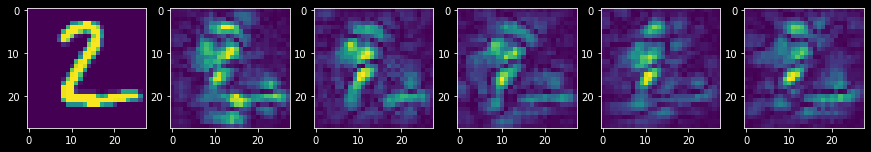

In [30]:
#Generate multiple saliency maps
input_idx = 1
saliency_maps = []
predicted_classes = []
for classifier in lenets:
    saliency_maps.append(visualize_saliency(model = classifier,layer_idx = 9, filter_indices = np.argmax(testY[input_idx]), seed_input = testX[input_idx]))
    predicted_classes.append(np.argmax(classifier.predict(testX)[input_idx]))

image_saliency_maps = saliency_maps
fig, ax = plt.subplots(nrows=1, ncols=classifier_number+1, figsize = (15,15))
i = 1
for s_map in image_saliency_maps:
    ax[i].imshow(s_map.reshape(28,28),interpolation="nearest")
    i = i+1
ax[0].imshow(testX[input_idx].reshape(28,28))
plt.show()

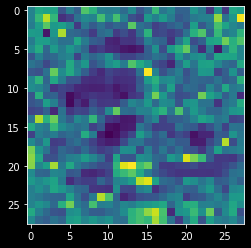

In [31]:
# Compute difference of saliency maps
saliency_map_difference = np.std(saliency_maps,axis=0)/np.average(saliency_maps,axis=0)
plt.imshow(saliency_map_difference)
plt.show()

In [32]:
#Compute the average difference value for each pixel
np.average(saliency_map_difference)

0.55027443

In [33]:
#Output the classes predicted by each classifier
predicted_classes

[2, 2, 2, 2, 2]

In [28]:
#Output classes that were misclassified by the singular classifier
idx = 0
for i in lenet.predict(testX):
    if (np.argmax(i) != np.argmax(testY[idx])):
        print(idx)
    idx = idx + 1

247
320
321
340
381
582
583
619
659
684
720
947
1003
1014
1039
1112
1226
1242
1247
1260
1299
1319
1378
1393
1500
1522
1530
1621
1681
1709
1737
1754
1901
2016
2035
2098
2109
2130
2135
2182
2189
2326
2387
2406
2414
2455
2488
2654
2730
2896
2921
2927
2953
3060
3073
3251
3503
3520
3558
3574
3597
3702
3767
3796
3808
3850
3869
3893
3902
3985
4065
4078
4176
4224
4369
4400
4443
4477
4497
4500
4639
4761
4807
4823
4880
4956
5331
5600
5642
5734
5842
5937
5955
5972
5973
5981
5982
5985
5997
6011
6059
6166
6532
6555
6571
6572
6576
6597
6651
6783
8094
8246
8325
8339
8408
8527
9009
9015
9024
9587
9634
9642
9679
9729
9749
9770
9792
9811
